<a href="https://colab.research.google.com/github/navidadkhah/Advanced-Bug-Detection-and-Fixing-Using-Fine-Tuned-LLM/blob/main/Evaluation/ROUGE_Metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize


In [1]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c1dbe3d217379ced84bb036803d12bbfd1b9b4021943a21fd5196b58299b1655
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [2]:
from rouge_score import rouge_scorer
import numpy as np
import pandas as pd

# Reading Datasets

In [3]:
# Original Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/bug_evaluation_dataset.csv"
df = pd.read_csv(path)
print(df.shape)
df.head()

(25793, 5)


,original_code,modified_code,changed_line,number_of_line,mutation_type
0,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,"for j in range(y-1, r):",14,statement
1,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,if k<1:,8,decision
2,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,if k<1:,8,decision
3,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,"for j in range(l&1, r):",14,operation
4,n = int(input())\nw = [2] * n\nans0 = n\nans =...,n = int(input())\nw = [2] * n\nans0 = n\nans =...,"l, r, k = list(z(int, input().split()))",7,statement


In [4]:
# Simple prompt Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_3000.csv"
simple_prompt_df = pd.read_csv(path)
print(simple_prompt_df.shape)
simple_prompt_df.head()

(3000, 1)


,simple_prompt
0,Here is the corrected code:\n\n```\nn = int(in...
1,```\nn = int(input())\nw = [2] * n\nans0 = n\n...
2,```\nn = int(input())\nw = [2] * n\nans = [0] ...
3,```\nn = int(input())\nw = [2] * n\nans0 = n\n...
4,```\nn = int(input())\nw = [2] * n\nans0 = n\n...


In [5]:
# Comment prompt Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_comments_1000.csv"
commented_prompt_df = pd.read_csv(path)
print(commented_prompt_df.shape)
commented_prompt_df.head()

(1000, 1)


,simple_prompt
0,Here is the code with comments:\n\n```\nn = in...
1,Here is the code with comments:\n\n```\nn = in...
2,Here is the code with comments:\n\n```\nn = in...
3,Here is the code with comments:\n\n```\nn = in...
4,Here is the code with comments:\n\n```\nn = in...


In [6]:
# Comment prompt with persona Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_comment_persona_500.csv"
commented_persona_df = pd.read_csv(path)
print(commented_persona_df.shape)
commented_persona_df.head()

(500, 1)


,simple_prompt
0,I'd be happy to help!\n\n**Step 1: Realize the...
1,I'll follow the steps to fix the bug.\n\n**Ste...
2,I'd be happy to help you debug and improve thi...
3,I'll follow the steps to fix the bug.\n\n**Ste...
4,I'll follow the steps to fix the bug.\n\n**Ste...


In [7]:
# hallucination prompt Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_hallucination_500.csv"
hallucination_prompt_df = pd.read_csv(path)
print(hallucination_prompt_df.shape)
hallucination_prompt_df.head()

(500, 1)


,simple_prompt
0,Here's the step-by-step process:\n\n**Step 1: ...
1,Here is the code with comments:\n\n```\n# Read...
2,Here are the steps:\n\n**Step 1: Realize the c...
3,Here are the steps:\n\n**Step 1: Realize the c...
4,Here are the steps:\n\n**Step 1: Understand th...


In [8]:
# Comment prompt with new persona Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_comment_persona_new_1000.csv"
new_persona_prompt_df = pd.read_csv(path)
print(new_persona_prompt_df.shape)
new_persona_prompt_df.head()

(1000, 1)


,simple_prompt
0,Here is the analyzed code with comments:\n\n``...
1,Here is the fixed code:\n\n```python\nn = int(...
2,Here is the fixed code:\n\n```\nn = int(input(...
3,Here is the fixed code:\n\n```\nn = int(input(...
4,Here is the analyzed code with comments:\n\n``...


In [9]:
# COT_df
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_COT_500.csv"
COT_df = pd.read_csv(path)
print(COT_df.shape)
COT_df.head()

(500, 1)


,simple_prompt
0,The bug in this code is that the variable `y` ...
1,The bug in this code is that it doesn't initia...
2,Here's the corrected code:\n\n```Python\nn = i...
3,The problem with this code is that it doesn't ...
4,The bug in this code is that it's trying to us...


In [10]:
# FewShot Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_fewShot.csv"
few_df = pd.read_csv(path)
print(few_df.shape)
few_df.head()

(1000, 1)


,simple_prompt
0,The submitted code is:\n\n```\nn = int(input()...
1,The submitted code: \n\n```\nn = int(input())\...
2,Here is the fixed code:\n\n```\nn = int(input(...
3,Fixed code: n = int(input())\nw = [2] * n\nans...
4,Fixed code:\n\nn = int(input())\nw = [2] * n\n...


In [11]:
# Fine-Tuned Dataset
path = "/content/drive/MyDrive/Bachelor\'s project/llm_response_fine_tuned200.csv"
fine_tuned_df = pd.read_csv(path)
print(fine_tuned_df.shape)
fine_tuned_df.head()

(201, 1)


,Response
0,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,n = int(input())\nw = [2] * n\nans0 = n\nans =...


# Preprocessing Datasets

In [12]:
# Preprocess commented_prompt_df
def generate_code_from_list(lines):
    # Join the list of strings into a single code block
    code_block = "\n".join(lines)

    # Remove any lines before and after the code block
    code_block = code_block.split('```')[1].split('```')[0].strip()

    # Replace the placeholder 'x' with a proper definition (e.g., 'a')
    # code_block = code_block.replace("x", "a")  # Fixing the undefined variable bug

    # Remove comments (inline and block)
    code_block = "\n".join([
        line.split("#")[0].strip()  # Keep only the part before the inline comment (if any)
        for line in code_block.splitlines()
        if line.strip() and not line.strip().startswith("#")  # Exclude full-line comments
    ])


    if code_block.startswith("python"):
       code_block = code_block[len("python"):].strip()
    elif code_block.startswith("Python"):
         code_block = code_block[len("Python"):].strip()

    return code_block


# Iterate over each row in the DataFrame
for row in range(len(commented_prompt_df)):
    # Split the 'simple_prompt' into lines
    input_lines = commented_prompt_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    commented_prompt_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
commented_prompt_df.head()

,simple_prompt,generated_code
0,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Here is the code with comments:\n\n```\nn = in...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


In [13]:
# Preprocess hallucination_prompt_df
def extract_last_code_block(lines):
    # Join the list into a single text block
    text_block = "\n".join(lines)
    # print(text_block)

    # Split by ```
    code_blocks = text_block.split('```')
    # print(len(code_blocks))

    # Return the last part of the split
    if(code_blocks[len(code_blocks)-2].strip().startswith("*")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Step")\
       or code_blocks[len(code_blocks)-2].strip().startswith("The")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Code")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Fixed")\
       or code_blocks[len(code_blocks)-2].strip().startswith("...")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Now")\
       or code_blocks[len(code_blocks)-2].strip().startswith("This")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Bug")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Here")):
       last_part = code_blocks[len(code_blocks)-1].strip() if code_blocks else ""
    else:
       last_part = code_blocks[len(code_blocks)-2].strip() if code_blocks else ""

    if last_part.startswith("python"):
       last_part = last_part[len("python"):].strip()
    elif last_part.startswith("Python"):
         last_part = last_part[len("Python"):].strip()


    non_blank_lines = [line for line in last_part.splitlines() if line.strip()]
    return "\n".join(non_blank_lines)

    # return cleaned_lines

    # return last_part

# Iterate over each row in the DataFrame
for row in range(len(hallucination_prompt_df)):
    # Split the 'simple_prompt' into lines
    input_lines = hallucination_prompt_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = extract_last_code_block(input_lines)
    # print(f"Iteration number {row} has finished")

    # # Save the generated code into a new column
    hallucination_prompt_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
hallucination_prompt_df.head()

,simple_prompt,generated_code
0,Here's the step-by-step process:\n\n**Step 1: ...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,Here is the code with comments:\n\n```\n# Read...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here are the steps:\n\n**Step 1: Realize the c...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,Here are the steps:\n\n**Step 1: Realize the c...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Here are the steps:\n\n**Step 1: Understand th...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


In [14]:
# Preprocess commented_persona_df
def generate_code_from_list(lines):
    # Join the list of strings into a single code block
    code_block = "\n".join(lines)

    # Remove any lines before and after the code block
    code_block = code_block.split('```')[1].split('```')[0].strip()

    # Replace the placeholder 'x' with a proper definition (e.g., 'a')
    # code_block = code_block.replace("x", "a")  # Fixing the undefined variable bug

    # Remove comments (inline and block)
    code_block = "\n".join([
        line.split("#")[0].strip()  # Keep only the part before the inline comment (if any)
        for line in code_block.splitlines()
        if line.strip() and not line.strip().startswith("#")  # Exclude full-line comments
    ])


    if code_block.startswith("python"):
       code_block = code_block[len("python"):].strip()
    elif code_block.startswith("Python"):
         code_block = code_block[len("Python"):].strip()

    return code_block



# Iterate over each row in the DataFrame
for row in range(len(commented_persona_df)):
    # Split the 'simple_prompt' into lines
    input_lines = commented_persona_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    commented_persona_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
commented_persona_df.head()

,simple_prompt,generated_code
0,I'd be happy to help!\n\n**Step 1: Realize the...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,I'll follow the steps to fix the bug.\n\n**Ste...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,I'd be happy to help you debug and improve thi...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
3,I'll follow the steps to fix the bug.\n\n**Ste...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,I'll follow the steps to fix the bug.\n\n**Ste...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


In [15]:
def generate_code_from_list(lines):
    # Join the list into a single text block
    text_block = "\n".join(lines)
    # print(text_block)

    # Split by ```
    code_blocks = text_block.split('```')
    # print(len(code_blocks))

    # Return the last part of the split
    if(code_blocks[len(code_blocks)-2].strip().startswith("*")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Step")\
       or code_blocks[len(code_blocks)-2].strip().startswith("The")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Code")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Fixed")\
       or code_blocks[len(code_blocks)-2].strip().startswith("...")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Now")\
       or code_blocks[len(code_blocks)-2].strip().startswith("This")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Bug")\
       or code_blocks[len(code_blocks)-2].strip().startswith("Here")):
       last_part = code_blocks[len(code_blocks)-1].strip() if code_blocks else ""
    else:
       last_part = code_blocks[len(code_blocks)-2].strip() if code_blocks else ""

    if last_part.startswith("python"):
       last_part = last_part[len("python"):].strip()
    elif last_part.startswith("Python"):
         last_part = last_part[len("Python"):].strip()


    non_blank_lines = [line for line in last_part.splitlines() if line.strip()]
    return "\n".join(non_blank_lines)


# Iterate over each row in the DataFrame
for row in range(len(new_persona_prompt_df)):
    # Split the 'simple_prompt' into lines
    input_lines = new_persona_prompt_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    new_persona_prompt_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
new_persona_prompt_df.head()

,simple_prompt,generated_code
0,Here is the analyzed code with comments:\n\n``...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,Here is the fixed code:\n\n```python\nn = int(...,n = int(input())\nw = [2] * n\nans = []\nq = i...
2,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2] * n\nans = []\nq = i...
3,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2] * n\nans = []\nq = i...
4,Here is the analyzed code with comments:\n\n``...,n = int(input()) # get the number of elements...


In [16]:
# Preprocess commented_prompt_df
def generate_code_from_list(lines):
    # Join the list of strings into a single code block
    code_block = "\n".join(lines)

    # Remove any lines before and after the code block
    code_block = code_block.split('```')[1].split('```')[0].strip()

    # Replace the placeholder 'x' with a proper definition (e.g., 'a')
    # code_block = code_block.replace("x", "a")  # Fixing the undefined variable bug

    # Remove comments (inline and block)
    code_block = "\n".join([
        line.split("#")[0].strip()  # Keep only the part before the inline comment (if any)
        for line in code_block.splitlines()
        if line.strip() and not line.strip().startswith("#")  # Exclude full-line comments
    ])


    if code_block.startswith("python"):
       code_block = code_block[len("python"):].strip()
    elif code_block.startswith("Python"):
         code_block = code_block[len("Python"):].strip()

    return code_block


# Iterate over each row in the DataFrame
for row in range(len(COT_df)):
    # Split the 'simple_prompt' into lines
    input_lines = COT_df['simple_prompt'][row].split("\n")

    # # Generate the corrected code block without comments
    generated_code = generate_code_from_list(input_lines)

    # # Save the generated code into a new column
    COT_df.at[row, 'generated_code'] = generated_code

# Now 'simple_prompt_df' will have a 'generated_code' column with the results
COT_df.head()
# COT_df.to_csv("/content/drive/MyDrive/Bachelor\'s project/llm_response_checkpoint_COT_500_midify.csv")

,simple_prompt,generated_code
0,The bug in this code is that the variable `y` ...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,The bug in this code is that it doesn't initia...,n = int(input())\nw = [2] * n\nans = [0] * q\n...
2,Here's the corrected code:\n\n```Python\nn = i...,n = int(input())\nw = [2] * n\nans = []\nq = i...
3,The problem with this code is that it doesn't ...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,The bug in this code is that it's trying to us...,n = int(input())\nw = [2] * n\nans0 = 0\nans =...


In [17]:
import re

def extract_clean_code_remove_submitted(text):
    # Check for code wrapped in backticks first
    match = re.search(r"```(?:python)?\n(.*?)```", text, re.DOTALL)
    if match:
        return match.group(1).strip()

    # Check for inline "Fixed code:" or similar phrases
    match = re.search(r"(?:[Ff]ixed code:|[Hh]ere's the fixed code:)(.*)", text, re.DOTALL)
    if match:
        return match.group(1).strip()

    # Handle multiline cases
    lines = text.splitlines()
    start_index = next((i for i, line in enumerate(lines)
                        if "Fixed code:" in line or "Here's the fixed code:" in line or "Submitted code:" in line), -1)
    if start_index != -1:
        # Extract lines after the label and skip lines with labels
        code_lines = [
            line for line in lines[start_index + 1:]
            if not re.search(r"(Fixed code:|Submitted code:|Here's the fixed code:)", line, re.IGNORECASE)
            and line.strip()  # Skip empty lines
        ]
        return "\n".join(code_lines).strip()

    # Return empty string if no matches
    return ""



# Apply the enhanced extraction function
few_df['generated_code'] = few_df['simple_prompt'].apply(extract_clean_code_remove_submitted)

# Display the first few rows to confirm updates
few_df.head(50)

# few_df.to_csv("/content/drive/MyDrive/Bachelor\'s project/llm_response_few_df_midify.csv")


,simple_prompt,generated_code
0,The submitted code is:\n\n```\nn = int(input()...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,The submitted code: \n\n```\nn = int(input())\...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2]*n\nans0 = n\nans = [...
3,Fixed code: n = int(input())\nw = [2] * n\nans...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Fixed code:\n\nn = int(input())\nw = [2] * n\n...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
5,The submitted code is:\n\n```\nn = int(input()...,n = int(input())\ngraph = {}\ninp = input().sp...
6,The submitted code is:\n\n```\nn = int(input()...,n = int(input())\ngraph = {}\ninp = input().sp...
7,The submitted code has an error. The while loo...,def f(n):\n count = 1\n while n > 0:\n ...
8,The input submitted code is:\n\n```\ndef f(n):...,def f(n):\n count = 1\n while(n>0):\n ...
9,The submitted code has an error in the line wh...,def f(n):\n count = 1\n while(n>0):\n ...


In [18]:
def remove_submitted_code(text):
    # Remove all occurrences of "Submitted code:" from the text
    lines = text.splitlines()

    # Remove lines containing "Submitted code:"
    cleaned_lines = [line for line in lines if "Submitted code:" not in line]

    cleaned_lines = [line for line in lines if "Fixed code:" not in line]


    # Join the cleaned lines back into a single string
    return "\n".join(cleaned_lines).strip()

few_df['generated_code'] = few_df['generated_code'].apply(remove_submitted_code)

# Display the first few rows to confirm updates
few_df.head()

,simple_prompt,generated_code
0,The submitted code is:\n\n```\nn = int(input()...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
1,The submitted code: \n\n```\nn = int(input())\...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
2,Here is the fixed code:\n\n```\nn = int(input(...,n = int(input())\nw = [2]*n\nans0 = n\nans = [...
3,Fixed code: n = int(input())\nw = [2] * n\nans...,n = int(input())\nw = [2] * n\nans0 = n\nans =...
4,Fixed code:\n\nn = int(input())\nw = [2] * n\n...,n = int(input())\nw = [2] * n\nans0 = n\nans =...


# Rouge metric

In [19]:
def calculate_mean_rouge_scores(dataset1, dataset2, column1, column2):
    # Initialize the ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

    # List to hold the scores
    results = []

    # Iterate over the datasets
    for ref, pred in zip(dataset1[column1], dataset2[column2]):
        # Compute the ROUGE scores
        scores = scorer.score(ref, pred)
        results.append({
            'rouge1_precision': scores['rouge1'].precision,
            'rouge1_recall': scores['rouge1'].recall,
            'rouge1_fmeasure': scores['rouge1'].fmeasure,
            'rougeL_precision': scores['rougeL'].precision,
            'rougeL_recall': scores['rougeL'].recall,
            'rougeL_fmeasure': scores['rougeL'].fmeasure
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Calculate mean of each metric
    mean_scores = results_df.mean()
    return mean_scores

In [20]:
Rouge_results =	[]

In [21]:
# Calculate ROUGE Metric for simple_prompt_df
results_df = calculate_mean_rouge_scores(simple_prompt_df, df, 'simple_prompt', 'original_code')
new_prompt_data = [results_df["rouge1_precision"], results_df["rouge1_recall"],
                   results_df["rouge1_fmeasure"], results_df["rougeL_precision"],
                   results_df["rougeL_recall"], results_df["rougeL_fmeasure"]]
Rouge_results.append(new_prompt_data)
results_df

,0
rouge1_precision,0.931557
rouge1_recall,0.940026
rouge1_fmeasure,0.930313
rougeL_precision,0.919387
rougeL_recall,0.927209
rougeL_fmeasure,0.917951


In [22]:
# Calculate ROUGE Metric for commented_prompt_df
results_df = calculate_mean_rouge_scores(commented_prompt_df, df, 'generated_code', 'original_code')
new_prompt_data = [results_df["rouge1_precision"], results_df["rouge1_recall"],
                   results_df["rouge1_fmeasure"], results_df["rougeL_precision"],
                   results_df["rougeL_recall"], results_df["rougeL_fmeasure"]]
Rouge_results.append(new_prompt_data)
results_df

,0
rouge1_precision,0.990630
rouge1_recall,0.993119
rouge1_fmeasure,0.991459
rougeL_precision,0.989951
rougeL_recall,0.992436
rougeL_fmeasure,0.990779


In [23]:
# Calculate ROUGE Metric for commented_persona_df
results_df = calculate_mean_rouge_scores(commented_persona_df, df, 'generated_code', 'original_code')
new_prompt_data = [results_df["rouge1_precision"], results_df["rouge1_recall"],
                   results_df["rouge1_fmeasure"], results_df["rougeL_precision"],
                   results_df["rougeL_recall"], results_df["rougeL_fmeasure"]]
Rouge_results.append(new_prompt_data)
results_df

,0
rouge1_precision,0.986726
rouge1_recall,0.992055
rouge1_fmeasure,0.987910
rougeL_precision,0.985973
rougeL_recall,0.991298
rougeL_fmeasure,0.987171


In [24]:
# Calculate ROUGE Metric for hallucination_prompt_df
results_df = calculate_mean_rouge_scores(hallucination_prompt_df, df, 'generated_code', 'original_code')
new_prompt_data = [results_df["rouge1_precision"], results_df["rouge1_recall"],
                   results_df["rouge1_fmeasure"], results_df["rougeL_precision"],
                   results_df["rougeL_recall"], results_df["rougeL_fmeasure"]]
Rouge_results.append(new_prompt_data)
results_df

,0
rouge1_precision,0.935826
rouge1_recall,0.918142
rouge1_fmeasure,0.914292
rougeL_precision,0.929550
rougeL_recall,0.910207
rougeL_fmeasure,0.908035


In [25]:
# Calculate ROUGE Metric for COT_df
results_df = calculate_mean_rouge_scores(COT_df, df, 'generated_code', 'original_code')
new_prompt_data = [results_df["rouge1_precision"], results_df["rouge1_recall"],
                   results_df["rouge1_fmeasure"], results_df["rougeL_precision"],
                   results_df["rougeL_recall"], results_df["rougeL_fmeasure"]]
Rouge_results.append(new_prompt_data)
results_df

,0
rouge1_precision,0.918631
rouge1_recall,0.939159
rouge1_fmeasure,0.925044
rougeL_precision,0.898605
rougeL_recall,0.918149
rougeL_fmeasure,0.904643


In [26]:
# Calculate ROUGE Metric for few_df
results_df = calculate_mean_rouge_scores(few_df, df, 'generated_code', 'original_code')
new_prompt_data = [results_df["rouge1_precision"], results_df["rouge1_recall"],
                   results_df["rouge1_fmeasure"], results_df["rougeL_precision"],
                   results_df["rougeL_recall"], results_df["rougeL_fmeasure"]]
Rouge_results.append(new_prompt_data)
results_df

,0
rouge1_precision,0.947311
rouge1_recall,0.933147
rouge1_fmeasure,0.935705
rougeL_precision,0.940428
rougeL_recall,0.926289
rougeL_fmeasure,0.928927


In [27]:
# Calculate ROUGE Metric for fine_tuned_df
results_df = calculate_mean_rouge_scores(fine_tuned_df, df, 'Response', 'original_code')
new_prompt_data = [results_df["rouge1_precision"], results_df["rouge1_recall"],
                   results_df["rouge1_fmeasure"], results_df["rougeL_precision"],
                   results_df["rougeL_recall"], results_df["rougeL_fmeasure"]]
Rouge_results.append(new_prompt_data)
results_df

,0
rouge1_precision,0.997121
rouge1_recall,0.997116
rouge1_fmeasure,0.997115
rougeL_precision,0.996965
rougeL_recall,0.996960
rougeL_fmeasure,0.996959


In [28]:
Rouge_results

[[0.9315572270298322,
  0.9400264930290572,
  0.9303133110180903,
  0.9193866136941293,
  0.9272093785272264,
  0.9179511948555158],
 [0.9906304120099737,
  0.9931188187317471,
  0.9914594100201527,
  0.9899506831693032,
  0.9924364316003293,
  0.9907790154160441],
 [0.9867260246213634,
  0.9920553646661863,
  0.9879098224366198,
  0.9859730184757178,
  0.991298181597738,
  0.9871706900961235],
 [0.9358257504686031,
  0.9181418935688589,
  0.9142917178381206,
  0.9295502855218304,
  0.9102070713780205,
  0.9080353923234324],
 [0.9186310020499368,
  0.9391586260634297,
  0.9250440582504285,
  0.8986048246173861,
  0.9181487148556139,
  0.904643444738751],
 [0.9473107572087679,
  0.9331465090022445,
  0.9357051774970965,
  0.940427975998501,
  0.9262885787061583,
  0.9289271847477151],
 [0.9971208174858387,
  0.9971157897066385,
  0.9971147568921407,
  0.9969653448490228,
  0.9969603170698226,
  0.9969592842553248]]

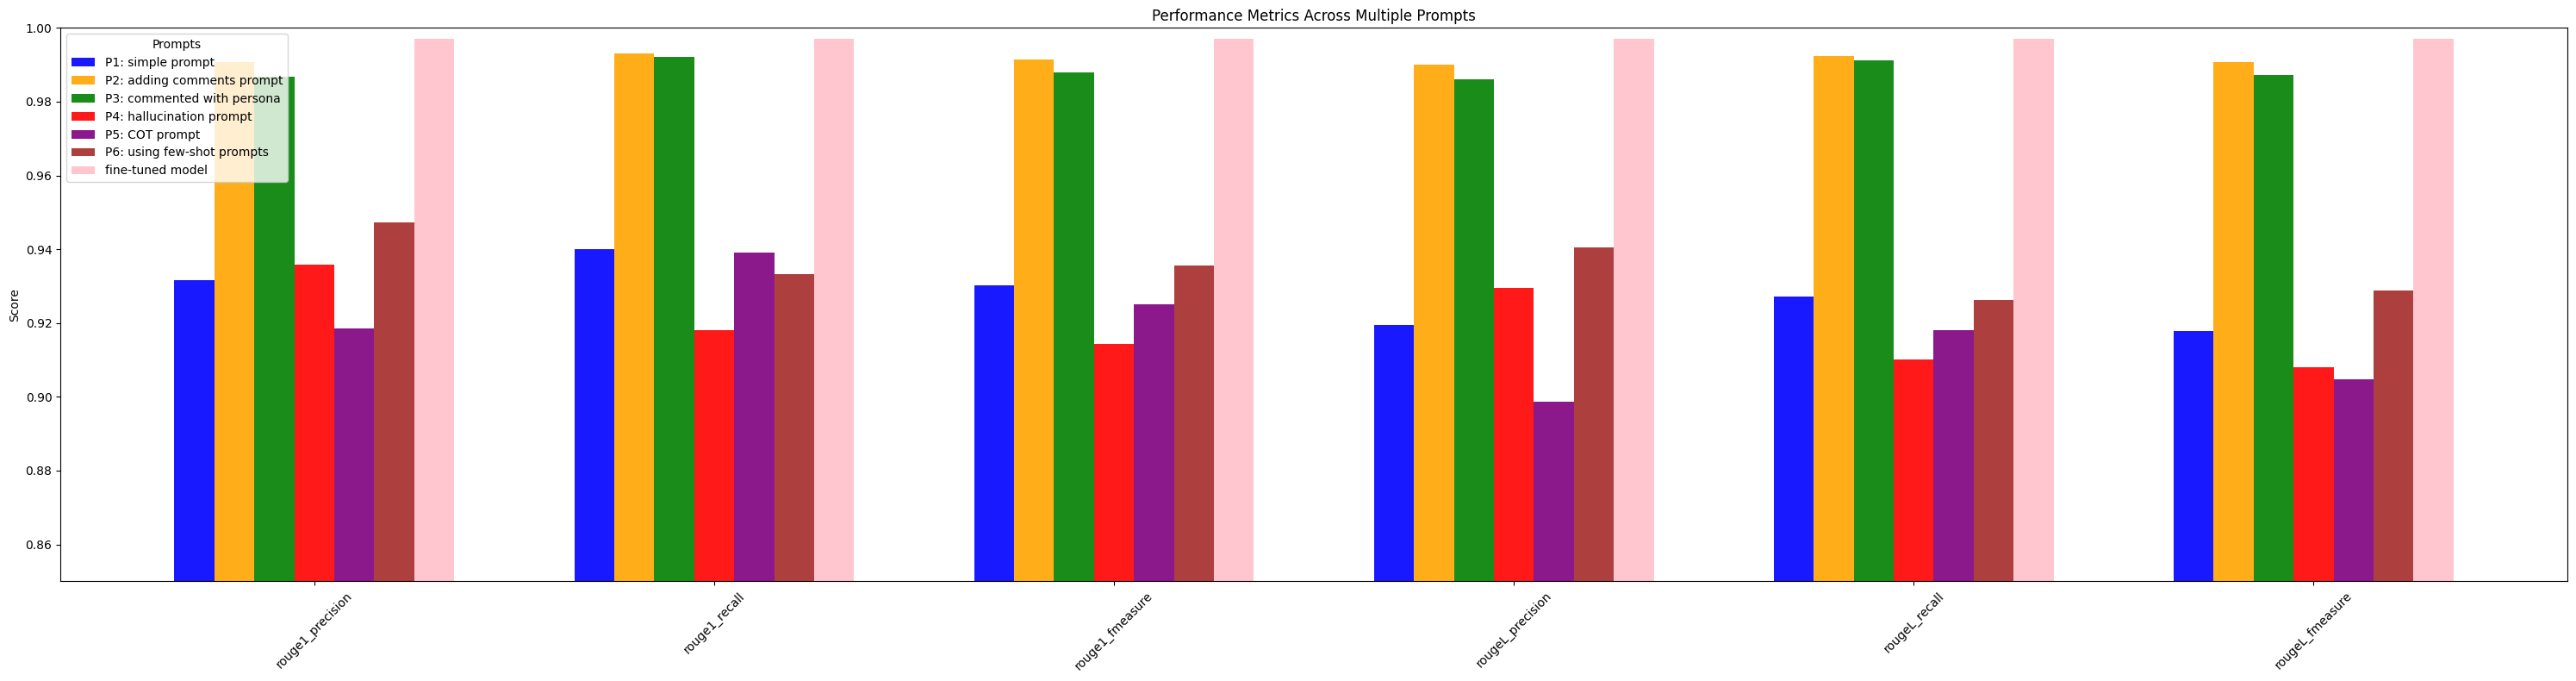

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data for multiple prompts
prompts = ['P1: simple prompt', 'P2: adding comments prompt', 'P3: commented with persona', 'P4: hallucination prompt', 'P5: COT prompt', 'P6: using few-shot prompts', 'fine-tuned model']
metrics = ['rouge1_precision', 'rouge1_recall', 'rouge1_fmeasure',
           'rougeL_precision', 'rougeL_recall', 'rougeL_fmeasure']

x = np.arange(len(metrics))  # Number of metrics
bar_width = 0.1  # Reduced width of each bar for thinner bars
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

plt.figure(figsize=(30, 8))
for i, prompt in enumerate(prompts):
    plt.bar(x + i * bar_width, Rouge_results[i], bar_width, label=prompt, alpha=0.9, color=colors[i])

# Formatting the plot
plt.xticks(x + bar_width * (len(prompts) - 1) / 2, metrics, rotation=45)
plt.ylabel('Score')
plt.title('Performance Metrics Across Multiple Prompts')

# Move the legend to the right
plt.legend(title='Prompts', bbox_to_anchor=(0, 1), loc='upper left')

# Adjust the y-axis to fit the range of your data
plt.ylim(0.85, 1.0)  # Adjust based on your actual data range

plt.tight_layout()
plt.show()
